# Introduction

**MNIST** (**"Modified National Institute of Standards and Technology"**) is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

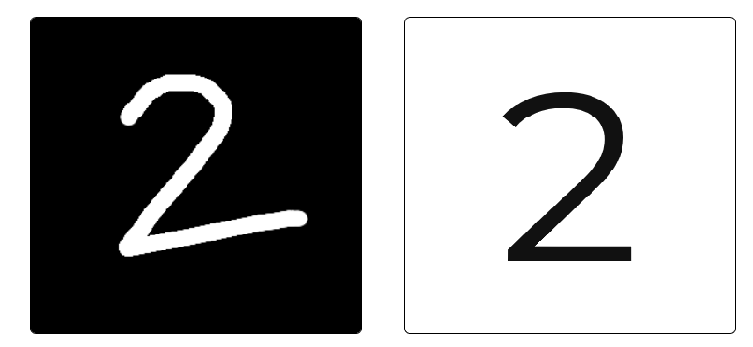

Courtsey to below notebook,
1. https://www.tensorflow.org/tutorials/keras/classification
1. For Image display : https://www.kaggle.com/kakauandme/tensorflow-deep-nn

# Importing libraries and data

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow.python.keras import regularizers

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

from sklearn.model_selection import train_test_split

In [ ]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [ ]:
train.head(5)

In [ ]:
train.shape,test.shape

# Visualizing images

In [ ]:
images = train.iloc[:,1:].values
images = images.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images = np.multiply(images, 1.0 / 255.0)

print('images({0[0]},{0[1]})'.format(images.shape))

In [ ]:
image_size = images.shape[1]
print ('image_size => {0}'.format(image_size))

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

print ('image_width => {0}\nimage_height => {1}'.format(image_width,image_height))

In [ ]:
# display image
def display(img):
    one_image = img.reshape(image_width,image_height)
    
    plt.axis('off')
    plt.imshow(one_image, cmap=cm.binary)

In [ ]:
IMAGE_TO_DISPLAY = 1
display(images[IMAGE_TO_DISPLAY])

In [ ]:
IMAGE_TO_DISPLAY = 2
display(images[IMAGE_TO_DISPLAY])

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train.iloc[:,1:], train.iloc[:,:1], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.values.reshape(-1, 1, 28, 28)
y_train = y_train.values.flatten()
X_valid = X_valid.values.reshape(-1, 1, 28, 28)
y_valid = y_valid.values.flatten()
X_test = test.values.reshape(-1, 1, 28, 28)

In [ ]:
X_train.shape, y_train.shape, X_test.shape

# Model Training

TensorFlow is a free and open-source software library for machine learning and artificial intelligence. It can be used across a range of tasks but has a particular focus on training and inference of deep neural networks.
TensorFlow was developed by the Google Brain team for internal Google use in research and production. The initial version was released under the Apache License 2.0 in 2015. Google released the updated version of TensorFlow, named TensorFlow 2.0, in September 2019.

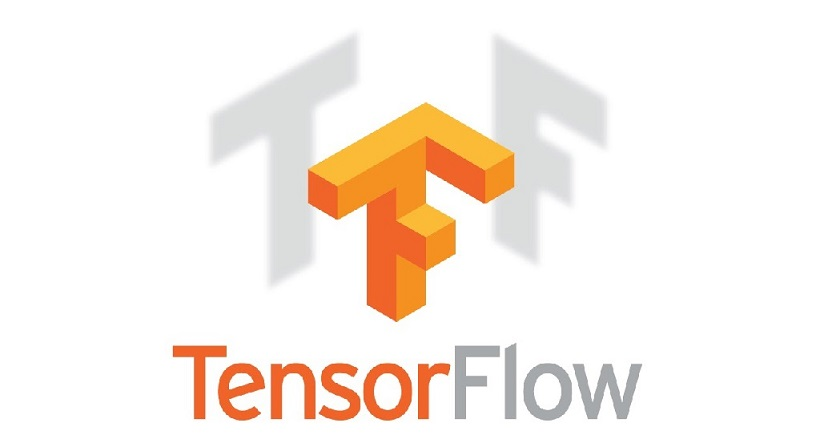

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(400, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(300,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(200,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(10)
])

**Regularization techniques:**
1. **Dropuot:** Dropout is very effective regularization techniques for neural networks The intuitive explanation for dropout is that because individual nodes in the network cannot rely on the output of the others, each node must output features that are useful on their own.
Dropout, applied to a layer, consists of randomly *dropping out* (i.e. set to zero) a number of output features of the layer during training. 
The *dropout rate* is the fraction of the features that are being zeroed-out; it is usually set between 0.2 and 0.5.
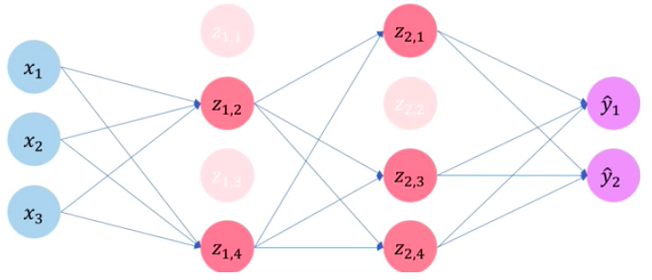

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
op = model.fit(X_train, y_train, epochs=50)

In [ ]:
valid_loss, valid_acc = model.evaluate(X_valid,  y_valid, verbose=2)

print('\nValid accuracy:', valid_acc)
print('\nValid loss:', valid_loss)

In [ ]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(X_test).argmax(axis=1)

In [ ]:
images_test = test.iloc[:,:].values
images_test = images_test.astype(np.float)

# convert from [0:255] => [0.0:1.0]
images_test = np.multiply(images_test, 1.0 / 255.0)

image_size = images_test.shape[1]

# in this case all images are square
image_width = image_height = np.ceil(np.sqrt(image_size)).astype(np.uint8)

In [ ]:
predictions[1]

In [ ]:
# output image     
display(images_test[1])

# Submission

In [ ]:
# save results
np.savetxt('submission.csv', np.c_[range(1,len(test)+1),predictions], 
           delimiter=',',  header = 'ImageId,Label', comments = '', fmt='%d')